In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Problem 1: K-means

### Generate 500 observations from a mixture of three Guassians with mixing weights $\pi$ = [0.2, 0.5, 0.3], and means and covariances as:

### $\mu_1 = \begin{bmatrix}
  0\\ 
  0
\end{bmatrix}$, $\Sigma_1 = \begin{bmatrix}
  1 & 0\\ 
  0 & 1
\end{bmatrix}$ 

###  $\mu_2 = \begin{bmatrix}
  3\\ 
  0
\end{bmatrix}$, $\Sigma_2 = \begin{bmatrix}
  1 & 0\\ 
  0 & 1
\end{bmatrix}$ 

### $\mu_3 = \begin{bmatrix}
  0\\ 
  3
\end{bmatrix}$, $\Sigma_3 = \begin{bmatrix}
  1 & 0\\ 
  0 & 1
\end{bmatrix}$ 

In [3]:
# data generating process
cov = np.matrix([[1,0],[0,1]])
mean1 = np.array([0,0])
mean2 = np.array([3,0])
mean3 = np.array([0,3])

gauss1 = np.random.multivariate_normal(mean1, cov, 500)
gauss2 = np.random.multivariate_normal(mean2, cov, 500)
gauss3 = np.random.multivariate_normal(mean3, cov, 500)

a) For K = 2,3,4,5, plot the value of the K-means objective function per iteration for 20 iterations

In [4]:
# set up
n_iter = 20
K = [2,3,4,5]

In [40]:
# update cluster assignment
def update_cluster(X, C):
    C_extended = C[:, np.newaxis]
    
    # euclidean distance
    distances = np.sqrt(((X - C_extended)**2).sum(axis =2))
    
    # return new assignment
    return np.argmin(distances, axis = 0)

In [41]:
# update centroid
def update_centroid(X, c, C):
    
    new_cluster = c
    
    # for each assignment, calculate the new centroid
    new_centroid = np.array([X[new_cluster == k].mean(axis = 0) for k in range(C.shape[0])])
    
    return new_centroid

In [42]:
# calculate objective fucntion
def objective_function(X, c, mu):
    
#     c = update_cluster(X, C)
#     mu = update_centroid(X, C)
    
    result = 0
    
    idx = 0
    for x in X:
#         print(c[idx])
#         print(mu[c[idx]])
        result += (np.sqrt(((x - mu[c[idx]])**2).sum()))
        idx += 1
        
    
    return result

In [79]:
def kmeans_pipeline(X, C):
    # randomly initialize centroid
    c = update_cluster(X, C)
    mu = update_centroid(X, c, C)
    L = objective_function(X, c, mu)
    
    return L, mu, c

In [80]:
np.random.rand(3, np.shape(gauss1)[1])

array([[0.63039997, 0.70696507],
       [0.63259792, 0.42718853],
       [0.1842419 , 0.11502241]])

In [81]:
result = []
c_result = []
i = 0
for k in K:
    temp = []
    # randomly initialize centroid
    centroids = np.random.rand(k, np.shape(gauss1)[1])
    while(i < n_iter):
        L, mu, c = kmeans_pipeline(gauss1, centroids)
        centroids = mu
        temp.append(L)
        i += 1
    
    result.append(temp)
    c_result.append(c)
    i = 0
    

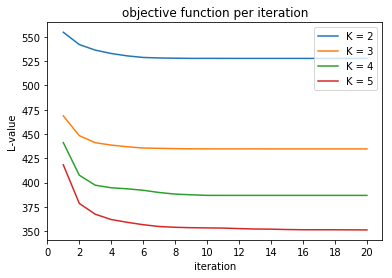

In [75]:
fig, ax = plt.subplots();
iteration = range(1,21,1)
ax.plot(iteration, result[0], label = 'K = 2');
ax.plot(iteration, result[1], label = 'K = 3');
ax.plot(iteration, result[2], label = 'K = 4');
ax.plot(iteration, result[3], label = 'K = 5');
ax.set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]);
ax.set_xlabel('iteration');
ax.set_ylabel('L-value');
ax.set_title('objective function per iteration');
ax.legend();

b) For K = 3,5 plot the 500 data points and indicate the cluster of each for the final iteration by marking it with a color or a symbol

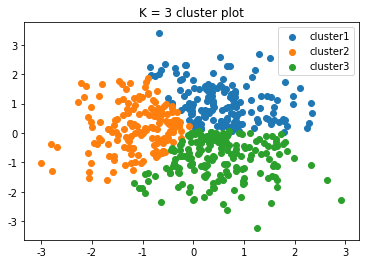

In [119]:
fig, ax = plt.subplots();

idx_list = []
for k in range(0, 3, 1):
    idx_list.append(np.where(c_result[1] == k))

ax.scatter(gauss1[idx_list[0], 0], gauss1[idx_list[0], 1], label = 'cluster1');
ax.scatter(gauss1[idx_list[1], 0], gauss1[idx_list[1], 1], label = 'cluster2');
ax.scatter(gauss1[idx_list[2], 0], gauss1[idx_list[2], 1], label = 'cluster3');
ax.set_title('K = 3 cluster plot');

ax.legend();

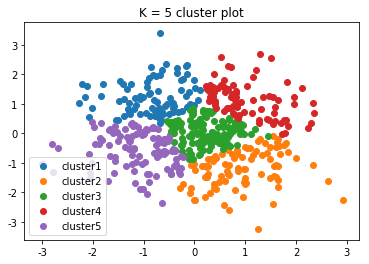

In [120]:
fig, ax = plt.subplots();

idx_list = []
for k in range(0, 5, 1):
    idx_list.append(np.where(c_result[3] == k))

ax.scatter(gauss1[idx_list[0], 0], gauss1[idx_list[0], 1], label = 'cluster1');
ax.scatter(gauss1[idx_list[1], 0], gauss1[idx_list[1], 1], label = 'cluster2');
ax.scatter(gauss1[idx_list[2], 0], gauss1[idx_list[2], 1], label = 'cluster3');
ax.scatter(gauss1[idx_list[3], 0], gauss1[idx_list[3], 1], label = 'cluster4');
ax.scatter(gauss1[idx_list[4], 0], gauss1[idx_list[4], 1], label = 'cluster5');
ax.set_title('K = 5 cluster plot');

ax.legend();

# Problem 2: Bayes classifier revisited

In [5]:
X_train = pd.read_csv('./hw3-data/Prob2_Xtrain.csv', header = False)
X_test = pd.read_csv('./hw3-data/Prob2_Xtest.csv')
y_train = pd.read_csv('./hw3-data/Prob2_ytrain.csv')
y_test = pd.read_csv('./hw3-data/Prob2_ytest.csv')

TypeError: Passing a bool to header is invalid. Use header=None for no header or header=int or list-like of ints to specify the row(s) making up the column names